# MultiEval Example

This notebook demonstrates a basic parameter sweep with LensKits `MultiEval` class.

## Setup

We first need to import our libraries.

In [230]:
from lenskit.batch import MultiEval
from lenskit.crossfold import partition_users, SampleN
from lenskit.algorithms import basic, als, item_knn, user_knn
from lenskit.datasets import MovieLens
from lenskit import topn, util
import pandas as pd
import matplotlib.pyplot as plt

Progress bars are useful:

In [212]:
from tqdm.notebook import tqdm_notebook as tqdm
tqdm.pandas()

C:\Users\Jacob\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


It takes a little while to run things, and can get kinda quiet in here. Let's set up logging so we can see the logging output in the notebook's message stream:

In [213]:
util.log_to_notebook()

[   INFO] lenskit.util.log log already initialized
[   INFO] lenskit.util.log log already initialized
[   INFO] lenskit.util.log log already initialized
[   INFO] lenskit.util.log notebook logging configured
[   INFO] lenskit.util.log notebook logging configured
[   INFO] lenskit.util.log notebook logging configured
[   INFO] lenskit.util.log notebook logging configured


Then set up the data access.

In [249]:
mlsmall = MovieLens('../data/ml-latest-small')
#mlsmall = MovieLens('../data/ml-1m')
#mlsmall = MovieLens('../data/ml-20m')


## Experiment

We're going to run our evaluation and store its output in the `my-eval` directory, generating 20-item recommendation lists::

In [250]:
eval = MultiEval('my-eval', recommend = 100)

We're going to use a 5-fold cross-validation setup.  We save the data into a list in memory so we have access to the test data later.  In a larger experiment, you might write the partitions to disk and pass the file names to `add_datasets`.

In [251]:
pairs = list(partition_users(mlsmall.ratings, 5, SampleN(5)))
eval.add_datasets(pairs, name = 'ML-Small')

[   INFO] lenskit.crossfold partitioning 100004 rows for 671 users into 5 partitions
[   INFO] lenskit.crossfold partitioning 100004 rows for 671 users into 5 partitions
[   INFO] lenskit.crossfold partitioning 100004 rows for 671 users into 5 partitions
[   INFO] lenskit.crossfold partitioning 100004 rows for 671 users into 5 partitions
[   INFO] lenskit.crossfold fold 0: selecting test ratings
[   INFO] lenskit.crossfold fold 0: selecting test ratings
[   INFO] lenskit.crossfold fold 0: selecting test ratings
[   INFO] lenskit.crossfold fold 0: selecting test ratings
[   INFO] lenskit.crossfold fold 0: partitioning training data
[   INFO] lenskit.crossfold fold 0: partitioning training data
[   INFO] lenskit.crossfold fold 0: partitioning training data
[   INFO] lenskit.crossfold fold 0: partitioning training data
[   INFO] lenskit.crossfold fold 1: selecting test ratings
[   INFO] lenskit.crossfold fold 1: selecting test ratings
[   INFO] lenskit.crossfold fold 1: selecting test rat

In [252]:
eval.add_algorithms([item_knn.ItemItem(nnbrs = f) for f in [10, 20, 30, 50, 75, 100]], 
                    attrs = ['nnbrs'], name = 'ItemKNN')

In [253]:
eval.add_algorithms([user_knn.UserUser(nnbrs = f) for f in [10, 20, 30, 50, 75, 100]], 
                    attrs = ['nnbrs'], name = 'UserKNN')

And add a popular baseline for comparison:

In [254]:
eval.add_algorithms(basic.Popular(), name = 'Pop')

And finally, we will run the experiment!

In [ ]:
eval.run(progress = tqdm)

[   INFO] lenskit.batch._multi starting run 1: ItemItem(nnbrs=10, msize=None) on ML-Small:1
[   INFO] lenskit.batch._multi starting run 1: ItemItem(nnbrs=10, msize=None) on ML-Small:1
[   INFO] lenskit.batch._multi starting run 1: ItemItem(nnbrs=10, msize=None) on ML-Small:1
[   INFO] lenskit.batch._multi starting run 1: ItemItem(nnbrs=10, msize=None) on ML-Small:1
[   INFO] lenskit.batch._multi adapting ItemItem(nnbrs=10, msize=None) into a recommender
[   INFO] lenskit.batch._multi adapting ItemItem(nnbrs=10, msize=None) into a recommender
[   INFO] lenskit.batch._multi adapting ItemItem(nnbrs=10, msize=None) into a recommender
[   INFO] lenskit.batch._multi adapting ItemItem(nnbrs=10, msize=None) into a recommender
[   INFO] lenskit.batch._multi training algorithm ItemItem(nnbrs=10, msize=None) on 99329 ratings
[   INFO] lenskit.batch._multi training algorithm ItemItem(nnbrs=10, msize=None) on 99329 ratings
[   INFO] lenskit.batch._multi training algorithm ItemItem(nnbrs=10, msize=N

[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/ItemItem(nnbrs=10, msize=None)
[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=10, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=10, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=10, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=10, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with

[   INFO] lenskit.batch._multi generating 675 predictions for TopN/ItemItem(nnbrs=20, msize=None)
[   INFO] lenskit.batch._multi generating 675 predictions for TopN/ItemItem(nnbrs=20, msize=None)
[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=20, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=20, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=20, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=20, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up P

[   INFO] lenskit.algorithms.item_knn [2.24s] computed 8766276 similarities for 9056 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.24s] computed 8766276 similarities for 9056 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.24s] computed 8766276 similarities for 9056 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.24s] computed 8766276 similarities for 9056 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.34s] sorting similarity matrix with 8766276 entries
[   INFO] lenskit.algorithms.item_knn [2.34s] sorting similarity matrix with 8766276 entries
[   INFO] lenskit.algorithms.item_knn [2.34s] sorting similarity matrix with 8766276 entries
[   INFO] lenskit.algorithms.item_knn [2.34s] sorting similarity matrix with 8766276 entries
[   INFO] lenskit.algorithms.item_knn [2.79s] got neighborhoods for 5734 of 9056 items
[   INFO] lenskit.algorithms.item_knn [2.80s] got neighborhoods for 5734 of 9056 items
[   INFO] lenskit.algorithms.item_knn 

[   INFO] lenskit.batch._multi starting run 4: ItemItem(nnbrs=50, msize=None) on ML-Small:1
[   INFO] lenskit.batch._multi starting run 4: ItemItem(nnbrs=50, msize=None) on ML-Small:1
[   INFO] lenskit.batch._multi adapting ItemItem(nnbrs=50, msize=None) into a recommender
[   INFO] lenskit.batch._multi adapting ItemItem(nnbrs=50, msize=None) into a recommender
[   INFO] lenskit.batch._multi adapting ItemItem(nnbrs=50, msize=None) into a recommender
[   INFO] lenskit.batch._multi adapting ItemItem(nnbrs=50, msize=None) into a recommender
[   INFO] lenskit.batch._multi training algorithm ItemItem(nnbrs=50, msize=None) on 99329 ratings
[   INFO] lenskit.batch._multi training algorithm ItemItem(nnbrs=50, msize=None) on 99329 ratings
[   INFO] lenskit.batch._multi training algorithm ItemItem(nnbrs=50, msize=None) on 99329 ratings
[   INFO] lenskit.batch._multi training algorithm ItemItem(nnbrs=50, msize=None) on 99329 ratings
[   INFO] lenskit.algorithms.item_knn [ 22ms] made sparse matrix

[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=50, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=50, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=50, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/ItemItem(nnbrs=50, msize=None) for 135 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommending with TopN/ItemItem(nnbrs=50, msize=None) for 135 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommending with TopN/ItemI

[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=75, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=75, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=75, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.sharing.shm serialized TopN/ItemItem(nnbrs=75, msize=None) to 1341 pickle bytes with 17 buffers of 212430704 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._predict generating 675 predictions for 135 users (setup took  210ms)
[   INFO] lenskit.batch._predict generating 675 predictions for 135 us

[   INFO] lenskit.algorithms.item_knn [2.31s] computed 8766276 similarities for 9056 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.31s] computed 8766276 similarities for 9056 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.43s] sorting similarity matrix with 8766276 entries
[   INFO] lenskit.algorithms.item_knn [2.43s] sorting similarity matrix with 8766276 entries
[   INFO] lenskit.algorithms.item_knn [2.43s] sorting similarity matrix with 8766276 entries
[   INFO] lenskit.algorithms.item_knn [2.43s] sorting similarity matrix with 8766276 entries
[   INFO] lenskit.algorithms.item_knn [2.92s] got neighborhoods for 5734 of 9056 items
[   INFO] lenskit.algorithms.item_knn [2.92s] got neighborhoods for 5734 of 9056 items
[   INFO] lenskit.algorithms.item_knn [2.92s] got neighborhoods for 5734 of 9056 items
[   INFO] lenskit.algorithms.item_knn [2.92s] got neighborhoods for 5734 of 9056 items
[   INFO] lenskit.algorithms.item_knn [2.92s] computed 8766276 neighbor 

[   INFO] lenskit.batch._multi adapting UserUser(nnbrs=10, min_sim=0) into a recommender
[   INFO] lenskit.batch._multi adapting UserUser(nnbrs=10, min_sim=0) into a recommender
[   INFO] lenskit.batch._multi adapting UserUser(nnbrs=10, min_sim=0) into a recommender
[   INFO] lenskit.batch._multi adapting UserUser(nnbrs=10, min_sim=0) into a recommender
[   INFO] lenskit.batch._multi training algorithm UserUser(nnbrs=10, min_sim=0) on 99329 ratings
[   INFO] lenskit.batch._multi training algorithm UserUser(nnbrs=10, min_sim=0) on 99329 ratings
[   INFO] lenskit.batch._multi training algorithm UserUser(nnbrs=10, min_sim=0) on 99329 ratings
[   INFO] lenskit.batch._multi training algorithm UserUser(nnbrs=10, min_sim=0) on 99329 ratings
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99329 ratings
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99329 ratings
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99329 

[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99329 ratings
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 99329 ratings
[   INFO] lenskit.batch._multi trained algorithm UserUser(nnbrs=20, min_sim=0) in  94ms
[   INFO] lenskit.batch._multi trained algorithm UserUser(nnbrs=20, min_sim=0) in  94ms
[   INFO] lenskit.batch._multi trained algorithm UserUser(nnbrs=20, min_sim=0) in  94ms
[   INFO] lenskit.batch._multi trained algorithm UserUser(nnbrs=20, min_sim=0) in  94ms
[   INFO] lenskit.batch._multi generating 675 predictions for TopN/UserUser(nnbrs=20, min_sim=0)
[   INFO] lenskit.batch._multi generating 675 predictions for TopN/UserUser(nnbrs=20, min_sim=0)
[   INFO] lenskit.batch._multi generating 675 predictions for TopN/UserUser(nnbrs=20, min_sim=0)
[   INFO] lenskit.batch._multi generating 675 predictions for TopN/UserUser(nnbrs=20, min_sim=0)
[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=20, min_sim=0) to 1121 

[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=30, min_sim=0) to 1121 pickle bytes with 13 buffers of 2983816 bytes
[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=30, min_sim=0) to 1121 pickle bytes with 13 buffers of 2983816 bytes
[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=30, min_sim=0) to 1121 pickle bytes with 13 buffers of 2983816 bytes
[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=30, min_sim=0) to 1121 pickle bytes with 13 buffers of 2983816 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._predict generating 675 predictions for 135 users (setup took  26ms)
[   INFO] lenskit.batch._predict generating 675 predictions for 135 users (setup to

[   INFO] lenskit.batch._predict generating 675 predictions for 135 users (setup took  20ms)
[   INFO] lenskit.batch._predict generating 675 predictions for 135 users (setup took  21ms)
[   INFO] lenskit.batch._predict generating 675 predictions for 135 users (setup took  22ms)
[   INFO] lenskit.batch._predict generated 675 predictions for 135 users in 12.46s
[   INFO] lenskit.batch._predict generated 675 predictions for 135 users in 12.46s
[   INFO] lenskit.batch._predict generated 675 predictions for 135 users in 12.46s
[   INFO] lenskit.batch._predict generated 675 predictions for 135 users in 12.46s
[   INFO] lenskit.batch._multi generated predictions in 12.94s
[   INFO] lenskit.batch._multi generated predictions in 12.94s
[   INFO] lenskit.batch._multi generated predictions in 12.94s
[   INFO] lenskit.batch._multi generated predictions in 12.94s
[   INFO] lenskit.batch._multi run 10: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi run 10: writing resu

[   INFO] lenskit.batch._multi run 11: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi run 11: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi run 11: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/UserUser(nnbrs=75, min_sim=0)
[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/UserUser(nnbrs=75, min_sim=0)
[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/UserUser(nnbrs=75, min_sim=0)
[   INFO] lenskit.batch._multi generating recommendations for 135 users for TopN/UserUser(nnbrs=75, min_sim=0)
[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=75, min_sim=0) to 1121 pickle bytes with 13 buffers of 2983816 bytes
[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=75, min_sim=0) to 1121 pickle bytes with 13 buffers of 2983816 bytes
[   INFO] lenskit.sharing.shm serializ

[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=100, min_sim=0) to 1121 pickle bytes with 13 buffers of 2983816 bytes
[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=100, min_sim=0) to 1121 pickle bytes with 13 buffers of 2983816 bytes
[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=100, min_sim=0) to 1121 pickle bytes with 13 buffers of 2983816 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/UserUser(nnbrs=100, min_sim=0) for 135 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommending with TopN/UserUser(nnbrs=100, min_sim=0) for 135 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommending with TopN/UserUser(nn

[   INFO] lenskit.algorithms.item_knn [ 67ms] normalized rating matrix columns
[   INFO] lenskit.algorithms.item_knn [ 70ms] normalized rating matrix columns
[   INFO] lenskit.algorithms.item_knn [ 72ms] computing similarity matrix
[   INFO] lenskit.algorithms.item_knn [ 74ms] computing similarity matrix
[   INFO] lenskit.algorithms.item_knn [ 78ms] computing similarity matrix
[   INFO] lenskit.algorithms.item_knn [ 80ms] computing similarity matrix
[   INFO] lenskit.algorithms.item_knn [ 87ms] splitting 9058 items (94654 ratings) into 10 blocks
[   INFO] lenskit.algorithms.item_knn [ 89ms] splitting 9058 items (94654 ratings) into 10 blocks
[   INFO] lenskit.algorithms.item_knn [ 90ms] splitting 9058 items (94654 ratings) into 10 blocks
[   INFO] lenskit.algorithms.item_knn [ 92ms] splitting 9058 items (94654 ratings) into 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.30s] computed 8767890 similarities for 9058 items in 10 blocks
[   INFO] lenskit.algorithms.item_knn [2.30s] comp

## Analysis

Now that the experiment is run, we can read its outputs.

First the run metadata:

In [238]:
runs = pd.read_csv('my-eval/runs.csv')
runs.set_index('RunId', inplace = True)
runs.head()

,DataSet,Partition,AlgoClass,AlgoStr,name,nnbrs,TrainTime,PredTime,RecTime
RunId,,,,,,,,,
1,ML-Small,1,ItemItem,"ItemItem(nnbrs=10, msize=None)",ItemKNN,10.0,3.659061,9.134039,10.360558
2,ML-Small,1,ItemItem,"ItemItem(nnbrs=20, msize=None)",ItemKNN,20.0,7.356655,17.644546,14.598085
3,ML-Small,1,ItemItem,"ItemItem(nnbrs=30, msize=None)",ItemKNN,30.0,3.658997,9.073628,10.698250
4,ML-Small,1,ItemItem,"ItemItem(nnbrs=50, msize=None)",ItemKNN,50.0,3.860284,8.947400,11.129404
5,ML-Small,1,ItemItem,"ItemItem(nnbrs=75, msize=None)",ItemKNN,75.0,3.667355,10.018123,11.644256


This describes each run - a data set, partition, and algorithm combination.  To evaluate, we need to get the actual recommendations, and combine them with this:

In [239]:
recs = pd.read_parquet('my-eval/recommendations.parquet')
recs.head()

,item,score,user,rank,RunId
0,1903,5.302788,20,1,1
1,107083,5.200252,20,2,1
2,893,5.019846,20,3,1
3,6273,4.914663,20,4,1
4,95858,4.887177,20,5,1


We're going to compute per-(run,user) evaluations of the recommendations *before* combining with metadata. 

In order to evaluate the recommendation list, we need to build a combined set of truth data. Since this is a disjoint partition of users over a single data set, we can just concatenate the individual test frames:

In [240]:
truth = pd.concat((p.test for p in pairs), ignore_index = True)

Now we can set up an analysis and compute the results.

In [245]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.precision) # precision, recall, recip_rank, dcg, ndcg
raw_ndcg = rla.compute(recs, truth)
raw_ndcg.head()

[   INFO] lenskit.topn analyzing 1113500 recommendations (3355 truth rows)
[   INFO] lenskit.topn analyzing 1113500 recommendations (3355 truth rows)
[   INFO] lenskit.topn analyzing 1113500 recommendations (3355 truth rows)
[   INFO] lenskit.topn analyzing 1113500 recommendations (3355 truth rows)
[   INFO] lenskit.topn using rec key columns ['RunId', 'user']
[   INFO] lenskit.topn using rec key columns ['RunId', 'user']
[   INFO] lenskit.topn using rec key columns ['RunId', 'user']
[   INFO] lenskit.topn using rec key columns ['RunId', 'user']
[   INFO] lenskit.topn using truth key columns ['user']
[   INFO] lenskit.topn using truth key columns ['user']
[   INFO] lenskit.topn using truth key columns ['user']
[   INFO] lenskit.topn using truth key columns ['user']
[   INFO] lenskit.topn collecting truth data
[   INFO] lenskit.topn collecting truth data
[   INFO] lenskit.topn collecting truth data
[   INFO] lenskit.topn collecting truth data
[   INFO] lenskit.topn collecting metric res

nrecs  precision
RunId user                  
1     20    100.0        0.0
      32    100.0        0.0
      34    100.0        0.0
      35    100.0        0.0
      36    100.0        0.0

Next, we need to combine this with our run data, so that we know what algorithms and configurations we are evaluating:

In [246]:
### FOR NEIGHBORHOOD-BASED METHODS ONLY ###
ndcg = raw_ndcg.join(runs[['AlgoClass', 'nnbrs']], on = 'RunId')
ndcg.head()

nrecs  precision AlgoClass  nnbrs
RunId user                                   
1     20    100.0        0.0  ItemItem   10.0
      32    100.0        0.0  ItemItem   10.0
      34    100.0        0.0  ItemItem   10.0
      35    100.0        0.0  ItemItem   10.0
      36    100.0        0.0  ItemItem   10.0

We can compute the overall average performance for each algorithm configuration - fillna makes the group-by happy with Popular's lack of a feature count:

In [248]:
### FOR NEIGHBORHOOD-BASED METHODS ONLY ###
ndcg.fillna(0).groupby(['AlgoClass', 'nnbrs'])['precision'].mean()

AlgoClass  nnbrs
0          0.0      0.002156
ItemItem   10.0     0.000715
           20.0     0.000417
           30.0     0.000402
           50.0     0.000343
           75.0     0.000283
           100.0    0.000268
Popular    0.0      0.014978
UserUser   10.0     0.000015
           20.0     0.000015
           30.0     0.000015
           50.0     0.000015
           75.0     0.000015
           100.0    0.000015
Name: precision, dtype: float64

Now, we can plot this:

Text(0, 0.5, 'nDCG')

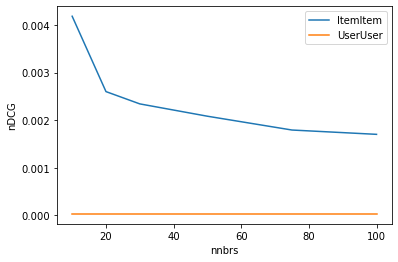

In [244]:
### FOR NEIGHBORHOOD-BASED METHODS ONLY ###
mf_scores = ndcg.groupby(['AlgoClass', 'nnbrs'])['ndcg'].mean().reset_index()
#pop_score = ndcg[ndcg['AlgoClass'] == 'Popular']['ndcg'].mean()
#plt.axhline(pop_score, color='grey', linestyle='--', label='Popular')
for algo, data in mf_scores.groupby('AlgoClass'):
    plt.plot(data['nnbrs'], data['ndcg'], label=algo)
plt.legend()
plt.xlabel('nnbrs')
plt.ylabel('nDCG')